## Load Dataset

In [1]:
from utility.preProcessor import *
from utility.featureExtractor import *
from utility.seizureClassifier import *

2025-08-18 01:45:09.395493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-18 01:45:09.395542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-18 01:45:09.396563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 01:45:09.402251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-18 01:45:09.992185: W tensorflow/compiler/tf2

In [2]:
# for i in range(3,9):
#     dumpFileId = f"Patient_{i}" 
#     dumpFilePath = f"dataset/{dumpFileId}_freatures.h5"

#     h5file = tables.open_file(dumpFilePath, mode="r+")

#     data_x = h5file.get_node(f'/{dumpFileId}/Data_x')
#     data_y = h5file.get_node(f'/{dumpFileId}/Data_y')

#     data_x_labels = h5file.get_node(f'/{dumpFileId}/Data_x_Feat_Names')

#     part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
#     part_feature_df['class'] = data_y[:]
#     part_feature_df = part_feature_df.set_index('class')

#     print(f'Initial Class Count {part_feature_df.index.value_counts()}')

#     df_binaryFeature = part_feature_df.loc[[0,1]]

#     print(f'Final Class Count {df_binaryFeature.index.value_counts()}')
#     print(f'Final DataFrame')

#     df_binaryFeature.head()
#     df_binaryFeature.to_csv(re.sub('.h5', '.csv',dumpFilePath))

## Training and Prediction

Epoch 1/6
302/302 [==============================] - 3s 7ms/step - loss: 2.8543 - accuracy: 0.8022 - val_loss: 0.4867 - val_accuracy: 0.9603
Epoch 2/6
302/302 [==============================] - 2s 6ms/step - loss: 0.3234 - accuracy: 0.9764 - val_loss: 0.7009 - val_accuracy: 0.9513
Epoch 3/6
302/302 [==============================] - 2s 6ms/step - loss: 0.4201 - accuracy: 0.9718 - val_loss: 5.8684e-04 - val_accuracy: 1.0000
Epoch 4/6
302/302 [==============================] - 2s 6ms/step - loss: 0.3214 - accuracy: 0.9774 - val_loss: 0.9229 - val_accuracy: 0.9368
Epoch 5/6
302/302 [==============================] - 2s 6ms/step - loss: 0.6529 - accuracy: 0.9562 - val_loss: 0.9467 - val_accuracy: 0.9386
Epoch 6/6
302/302 [==============================] - 2s 6ms/step - loss: 0.7812 - accuracy: 0.9490 - val_loss: 0.8914 - val_accuracy: 0.9422

✅ DNN Test Accuracy: 0.99
19/19 [==============================] - 0s 1ms/step

📊 DNN Classification Report:

              precision    recall  f1-s

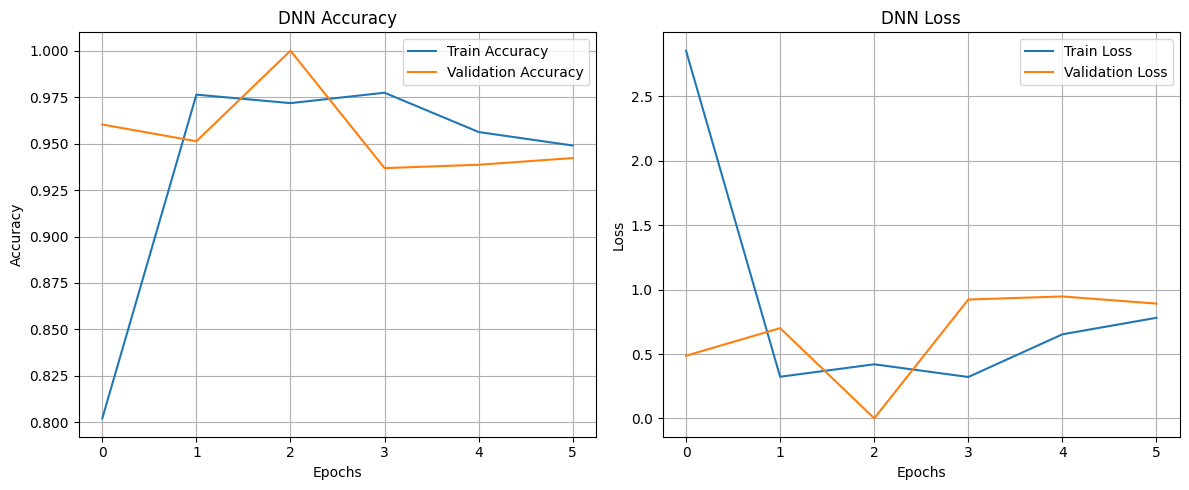


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       302

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

Random Forest tree visualization saved as 'random_forest_tree.png'.

SVM Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       302

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

SVM conceptual visualization saved as 'svm_model.png'.

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       302
 

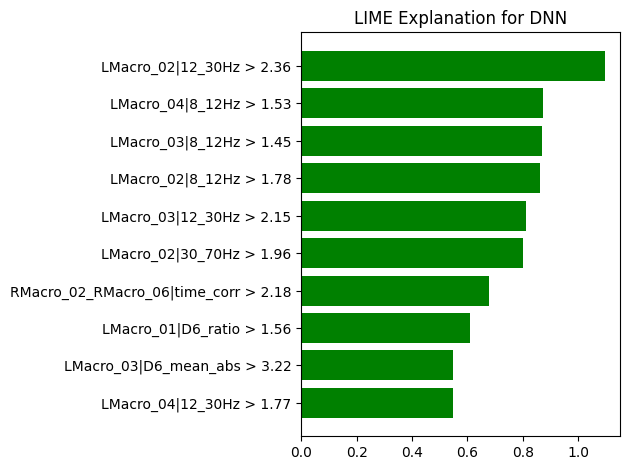

1/1 [==============================] - 0s 16ms/step
LIME explanation visualization saved as 'experiment/dnn_lime_explanation.png'

LIME Explanation for Random Forest:



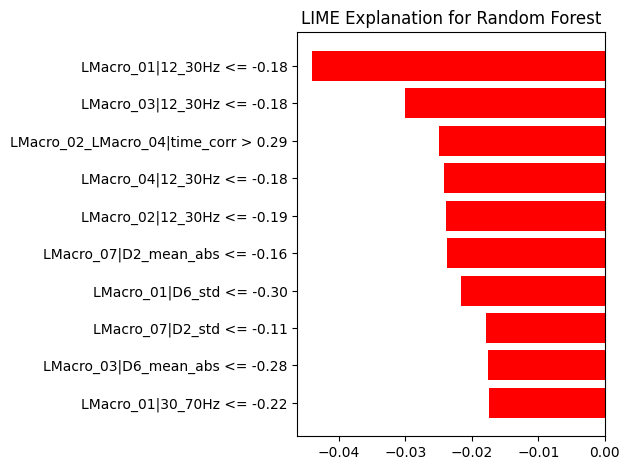

LIME explanation visualization saved as 'experiment/random_forest_lime_explanation.png'

LIME Explanation for SVM:



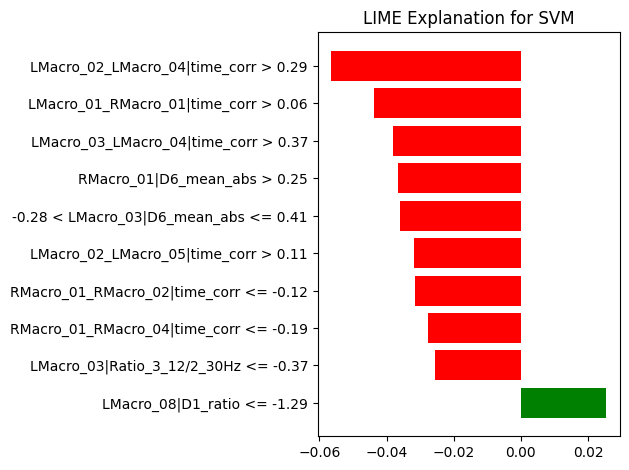

LIME explanation visualization saved as 'experiment/svm_lime_explanation.png'

LIME Explanation for Logistic Regression:



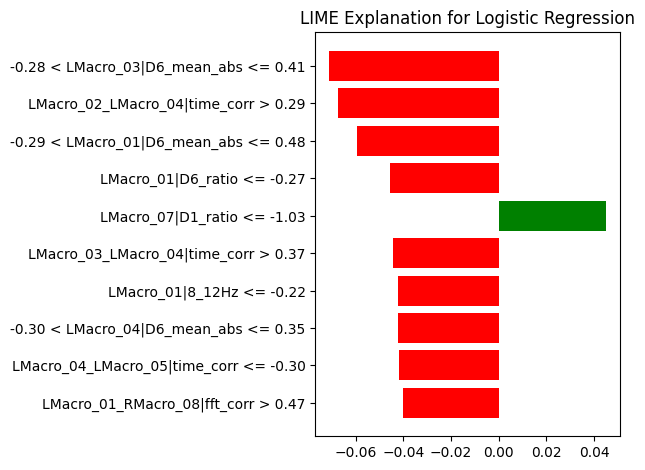

LIME explanation visualization saved as 'experiment/logistic_regression_lime_explanation.png'


In [8]:
df = pd.read_csv('./dataset/Patient_2_freatures.csv')

results = run_pipeline(df, {
    "test_size": 0.1,
    "random_state": 42,
    "scaler": StandardScaler(),
    # Increased units to give more representation power
    "dnn_layers_units": [128, 64, 32, 16],
    "dnn_activation": "relu",
    "dnn_optimizer": "adam",
    "dnn_epochs": 6,
    "dnn_batch_size": 16,
    "dnn_verbose": 1,
}, balance=True)
